In [ ]:
# %pip install statsmodels


In [4]:
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql import functions as f

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflowonspark import TFCluster

from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA

import os.path
from os import path


# Khởi tạo Spark Session
spark = SparkSession.builder.appName("kafka").getOrCreate()
sc = spark.sparkContext
# Tạo DataFrame mẫu
train_data = spark.read.csv("./train_data.csv", inferSchema=True, header=True)
test_data = spark.read.csv("./test_data.csv", inferSchema=True, header=True)


In [6]:
training_set = train_data.select("close").toPandas().values
# Thuc hien scale du lieu gia ve khoang 0,1
scaler = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = scaler.fit_transform(training_set)

In [5]:
test_set = test_data.select("close").toPandas().values
len(test_set)

249

In [55]:
test_set = test_data.select("close").toPandas().values
# test_set_scaled = scaler.transform(test_set)

In [98]:
# Xây dựng mô hình ARIMA
model = ARIMA(training_set, order=(30, 1, 60))  # Thay đổi order tùy thuộc vào dữ liệu
results = model.fit()

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [99]:
# Dự báo cho tương lai
forecast_steps = 249
forecast = results.forecast(steps=forecast_steps)


In [100]:
y_pre =forecast
y_pre = [[y] for y in y_pre]
# np.array(y_pre)

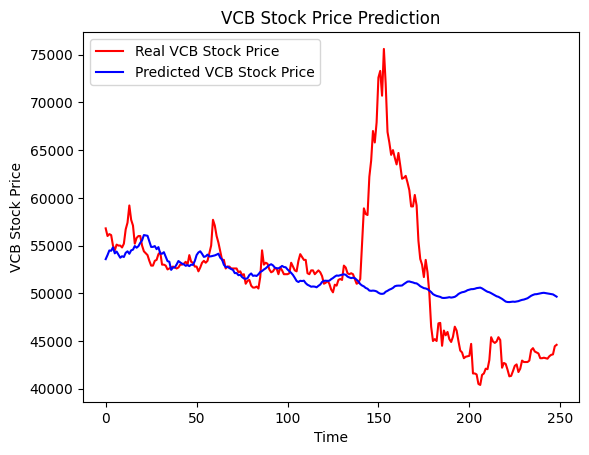

In [101]:
import matplotlib.pyplot as plt

# Ve bieu do gia that va gia du doan
plt.plot(test_set, color = 'red', label = 'Real VCB Stock Price')
plt.plot(y_pre, color = 'blue', label = 'Predicted VCB Stock Price')
plt.title('VCB Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('VCB Stock Price')
plt.legend()
# plt.savefig('svm_result.jpg')
plt.show()

In [102]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA

# # Tạo dữ liệu giả định
# np.random.seed(42)
# data = np.cumsum(np.random.randn(100))  # Chuỗi ngẫu nhiên

# # Xây dựng mô hình ARIMA
# model = ARIMA(data, order=(60, 1, 0))  # Thay đổi order tùy thuộc vào dữ liệu
# results = model.fit()

# # Dự báo cho tương lai
# forecast_steps = 10
# forecast = results.get_forecast(steps=forecast_steps)

# # Trực quan hóa kết quả
# plt.plot(data, label='Dữ liệu thực tế')
# plt.plot(np.arange(len(data), len(data) + forecast_steps), forecast.predicted_mean, label='Dự báo')
# plt.legend()
# plt.show()


In [103]:
# forecast.predicted_mean
